<a href="https://colab.research.google.com/github/ShaluRawat15/Data-Exploration-and-Visualisation/blob/main/Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
from google.colab import files
uploaded = files.upload()

Saving netflix case study data.csv to netflix case study data.csv


In [5]:
df=pd.read_csv('netflix case study data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.duplicated().sum()

0

**Checking for null values**

In [9]:
df.T.apply(lambda x: x.isnull().sum(), axis = 1)

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
df.isnull().sum().sum()

4307

The given dataset has 4307 null value entries.

In [12]:
for col in df:
  null_count = df[col].isnull().sum() / len(df) *100
  print(col , "=" ,null_count)

show_id = 0.0
type = 0.0
title = 0.0
director = 29.908027705234474
cast = 9.367548540933349
country = 9.435676166685592
date_added = 0.11354604292040424
release_year = 0.0
rating = 0.04541841716816169
duration = 0.034063812876121265
listed_in = 0.0
description = 0.0


We can drop rows where there is null values in date_added, rating, duration columns as it consist of very small part in our dataframe.

In [13]:
df.dropna(subset = ['date_added','rating','duration'],inplace=True)

In [14]:
df.dropna(subset = ['director','country','cast'], how = 'all',inplace=True)
df.shape

(8694, 12)

In [15]:
for col in df:
  null_count = df[col].isnull().sum() / len(df) *100
  print(col , "=" ,null_count)

show_id = 0.0
type = 0.0
title = 0.0
director = 29.043018173452957
cast = 8.385093167701864
country = 8.431101909362779
date_added = 0.0
release_year = 0.0
rating = 0.0
duration = 0.0
listed_in = 0.0
description = 0.0


In [16]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [17]:
df['rating'] =df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [18]:
df['rating'].isna().sum()

82

In [19]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8612 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8612 non-null   object
 1   type          8612 non-null   object
 2   title         8612 non-null   object
 3   director      6091 non-null   object
 4   cast          7900 non-null   object
 5   country       7879 non-null   object
 6   date_added    8612 non-null   object
 7   release_year  8612 non-null   int64 
 8   rating        8612 non-null   object
 9   duration      8612 non-null   object
 10  genre         8612 non-null   object
 11  description   8612 non-null   object
dtypes: int64(1), object(11)
memory usage: 874.7+ KB


**Changing date_added column from object to datetime format and Adding seperate columns as day, month, year, month_name, day_name
using date_added column.**

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8612 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8612 non-null   object        
 1   type          8612 non-null   object        
 2   title         8612 non-null   object        
 3   director      6091 non-null   object        
 4   cast          7900 non-null   object        
 5   country       7879 non-null   object        
 6   date_added    8612 non-null   datetime64[ns]
 7   release_year  8612 non-null   int64         
 8   rating        8612 non-null   object        
 9   duration      8612 non-null   object        
 10  genre         8612 non-null   object        
 11  description   8612 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 874.7+ KB


In [23]:
df['year'] = df['date_added'].dt.year
df['month']= df['date_added'].dt.month
df['month_name']=df['date_added'].dt.month_name()
df['date']=df['date_added'].dt.day
df['weekday']=df['date_added'].dt.day_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year,month,month_name,date,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September,25,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September,24,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,September,24,Friday
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,September,24,Friday


**Basic Analysis**
**1. Un-nesting the columns**
a. Un-nest the columns those have cells with multiple comma separated values by creating multiple rows.
We need to unnest the ‘director’ ‘cast’ ‘country’ and ‘listed_in’ columns to make our analysis easy and then merge them together to get final
dataframe for our case study.

In [24]:
#for director column
director = df["director"].apply(lambda x : str(x).split(", ")).tolist()
df_director = pd.DataFrame(director, index = df["title"])
df_director = df_director.stack()
df_director = df_director.reset_index()
df_director.drop(columns = "level_1" , inplace = True)
df_director.columns = ["title" , "director"]
df_director.replace('nan',np.NaN,inplace=True)

In [25]:
#for cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast, index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_cast.replace('nan',np.NaN,inplace=True)

In [26]:
# for country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
df_country.replace('nan',np.NaN,inplace=True)

In [27]:
# for genre column
genre = df["genre"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(genre, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
df_genre.replace('nan',np.NaN,inplace=True)

Now merging the dataframes

In [28]:
d1=df_cast.merge(df_genre, on = 'title')
d2=df_director.merge(d1, on = 'title')
d3=df_country.merge(d2, on = 'title')
new_df = df.merge(d3, on = 'title')
new_df.head()

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,...,description,year,month,month_name,date,weekday,country_y,director_y,cast_y,genre_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",2021,9,September,25,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


Droping the duplicate columns.

In [29]:
new_df.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
new_df.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
new_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,year,month,month_name,date,weekday,country,director,cast,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,9,September,25,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,24,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [30]:
new_df.shape

(199950, 17)

In [31]:
new_df.duplicated().sum()

55

In [32]:
new_df.drop_duplicates(keep='first',inplace=True)
new_df.shape

(199895, 17)

**2. Handling null values**
**a**. For categorical variables with null values, update those rows as unknown_column_name.
Example : Replace missing value with Unknown Actor for missing value in Actors column.

**b**. Replace with 0 for continuous variables having null values.

In [33]:
new_df['director'] = new_df['director'].replace(np.NaN,'Unknown director')
new_df['cast'] = new_df['cast'].replace(np.NaN,'Unknown cast')
new_df['country'] = new_df['country'].replace(np.NaN,'Unknown country')

As we can see there is no continuous variables that have null values.

In [34]:
df.isnull().sum()/len(df)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.273107
cast,8.267534
country,8.511379
date_added,0.000000
release_year,0.000000
rating,0.000000
duration,0.000000


In [35]:
df_movies = new_df.loc[new_df['type']=='Movie']
df_tvs = new_df.loc[new_df['type']=='TV Show']

In [36]:
df.shape[0]

8612

In [37]:
print(df['year'].min())
print(df['year'].max())

2008
2021


**1.Find the counts of each categorical variable both using graphical and non-graphical analysis.**


**FOR TYPE **

In [38]:
t=df['type'].value_counts()
t

,count
type,
Movie,6031
TV Show,2581


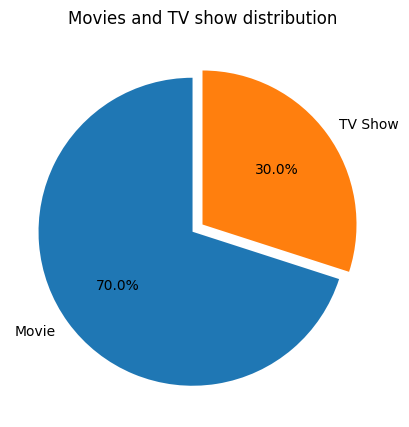

In [39]:
plt.figure(figsize=(10, 5))
plt.pie(t,labels=t.index, autopct='%.1f%%', explode = (0.08,0),startangle=90)
plt.title("Movies and TV show distribution")
plt.xticks(rotation=45)
plt.show()

There are a total of 6031 movies and 2581 TV shows to available.

Netfl ix has 70% of its content as movies.
TV Shows are clearly lesser than Movies.


**Recommendations**

More TV Shows should be added as they create more suspense and have more story than a 100 minute movie. Users like to binge watch a
particular story for a longer time.

**FOR DIRECTORS**

In [40]:
D=df_director['director'].nunique()
D

4925

There are a total of 4925 directors present in the data.


Lets see top active directors.

In [41]:
directors=new_df.drop_duplicates(subset = ['director','title'])
top_active_directors = directors['director'].value_counts()[1:11]
top_active_directors

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


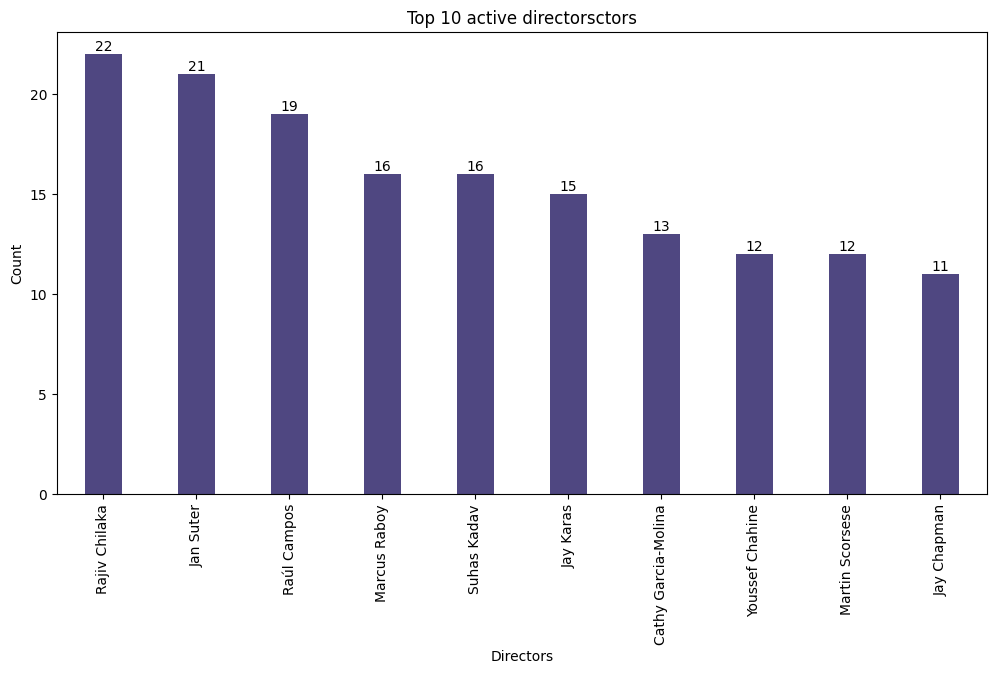

In [42]:
plt.figure(figsize=(12, 6))
label=sns.barplot(x=top_active_directors.index, y=top_active_directors.values, color='darkslateblue',width=0.4)
for i in label.containers:
  label.bar_label(i)
plt.title('Top 10 active directorsctors')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**FOR ACTORS**

In [43]:
df_cast['cast'].nunique()

36148

There are a total of 36148 actors present in the data.


Now lets see top active actors.

In [44]:
actors=new_df.drop_duplicates(subset = ['cast','title'])
top_active_actors = actors['cast'].value_counts()[1:11]
top_active_actors

,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Yuki Kaji,29
Om Puri,29


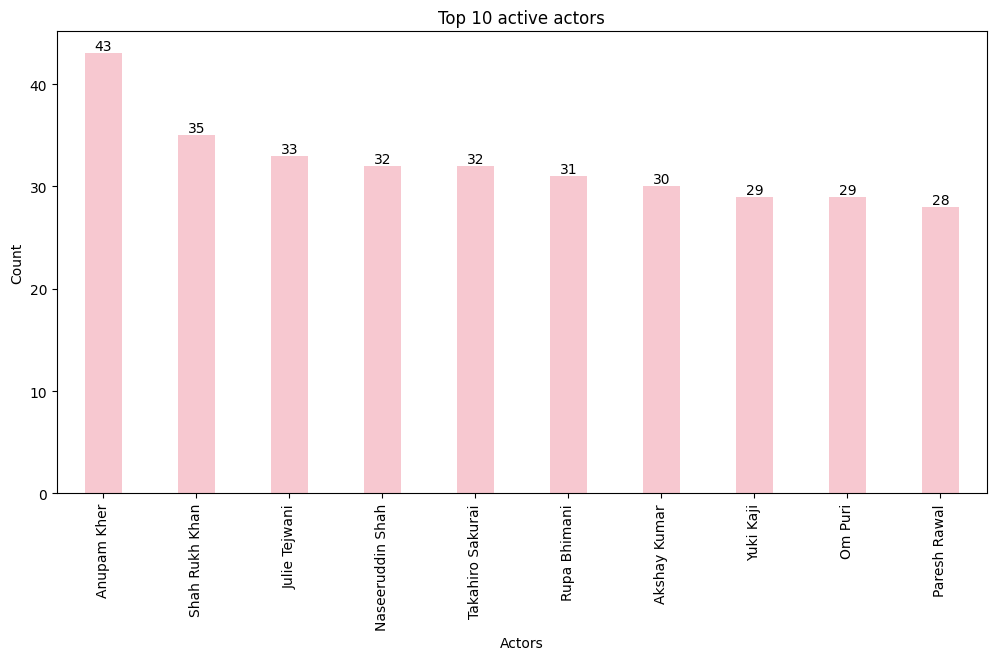

In [45]:
plt.figure(figsize=(12, 6))
label=sns.barplot(x=top_active_actors.index, y=top_active_actors.values, color='pink',width=0.4)
for i in label.containers:
  label.bar_label(i)
plt.title('Top 10 active actors')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

For Country


In [46]:
c=df_country['country'].nunique()
c

127

The content is distributed across 127 countries.


Countries with most movies and TV Show.

In [47]:
country = new_df["country"].value_counts().sort_values(ascending=False)[:10]
country

,count
country,
United States,58764
India,22682
United Kingdom,12686
Unknown country,11710
Japan,8599
France,8135
Canada,7861
Spain,5273
South Korea,4997


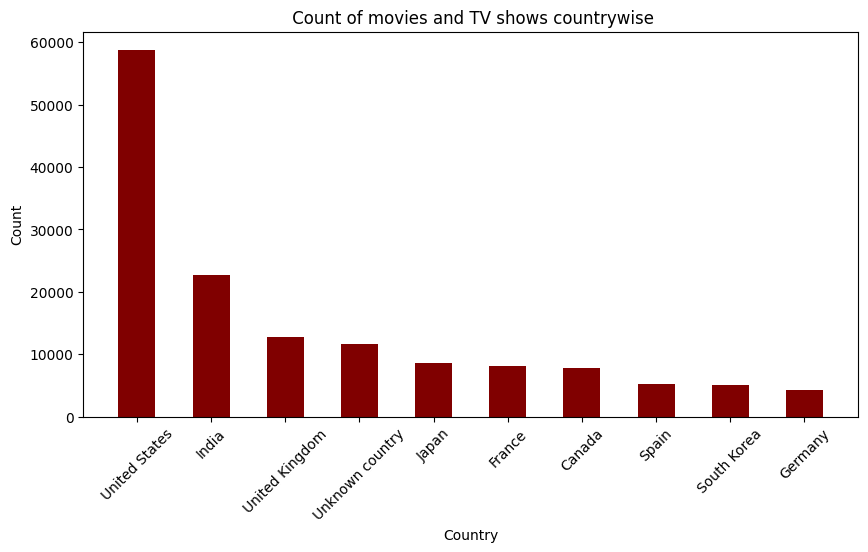

In [48]:
plt.figure(figsize=(10, 5))
plt.bar(country.index,country,color='maroon',width=0.5)
plt.title(" Count of movies and TV shows countrywise")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**FOR RATING**

In [49]:
r=df["rating"].value_counts()
r

,count
rating,
TV-MA,3172
TV-14,2136
TV-PG,843
R,799
PG-13,490
TV-Y7,326
TV-Y,292
PG,286
TV-G,218


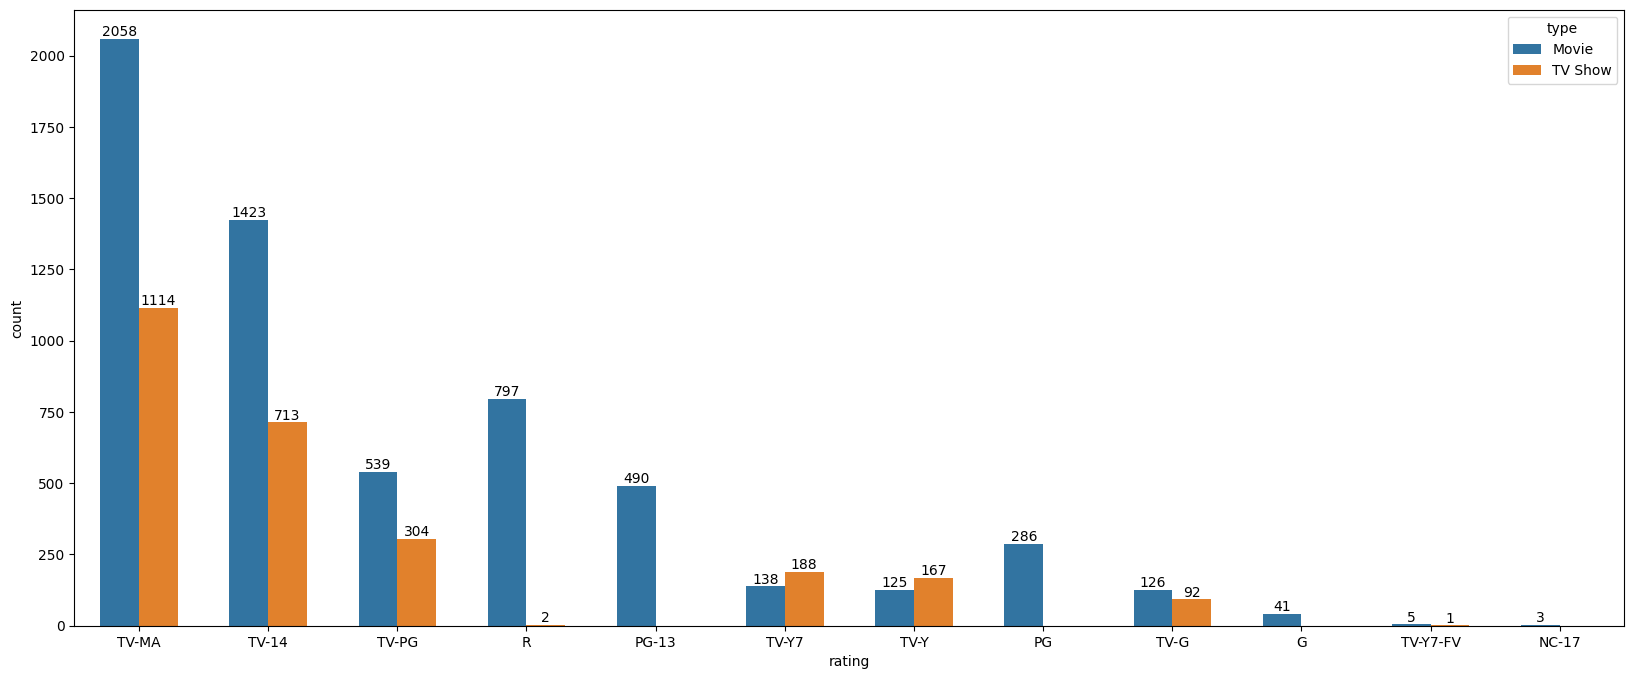

In [50]:
df_rating = df[df["rating"].isnull()== False]
df_rating.reset_index(inplace = True)
plt.figure(figsize=(20,8))
label=sns.countplot(x ="rating" , data = df_rating , hue = "type",order =df_rating['rating'].value_counts().index,width=0.6)
for i in label.containers:
  label.bar_label(i)
plt.show()

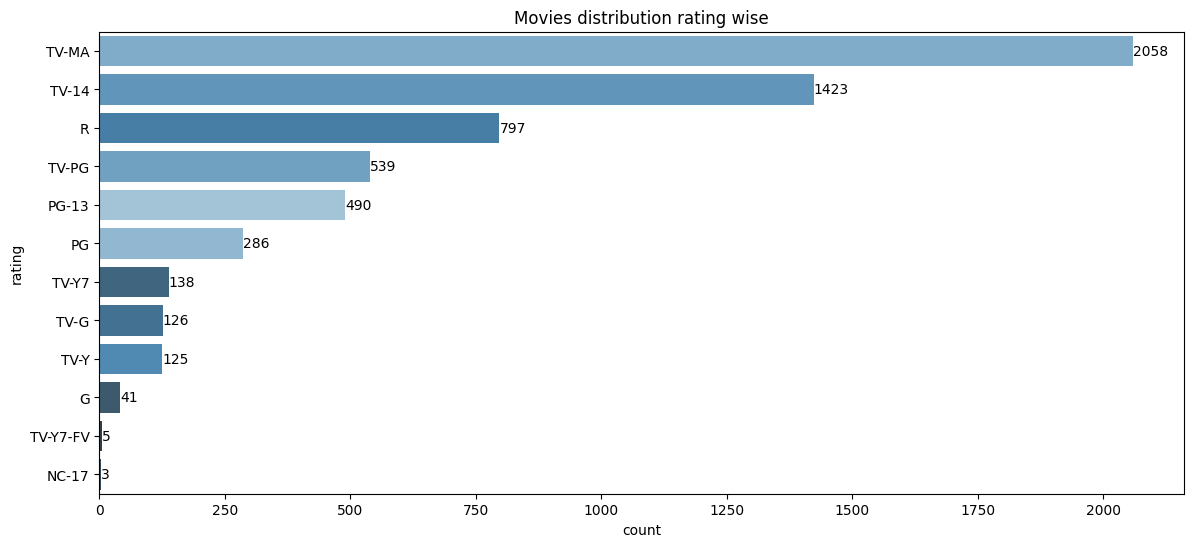

In [59]:
plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[df["type"] == "Movie", ["type", "rating"]]
label = sns.countplot(y="rating", data=movies_ratingwise, palette="Blues_d", order=movies_ratingwise['rating'].value_counts().index, hue="rating", dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([],[], frameon=False)
plt.title("Movies distribution rating wise")
plt.show()

**TV Shows distribution rating wise.**

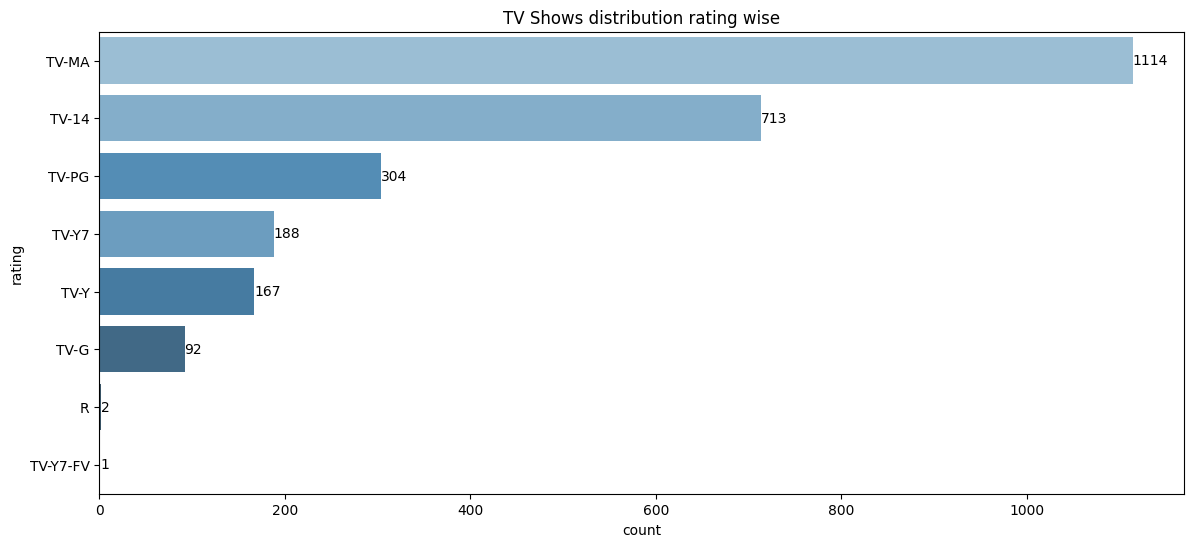

In [57]:
plt.figure(figsize=(14,6))
TVS_ratingwise = df.loc[df["type"] == "TV Show", ["type", "rating"]]
label = sns.countplot(y="rating", data=TVS_ratingwise, palette="Blues_d", order=TVS_ratingwise['rating'].value_counts().index, hue="rating", dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([],[], frameon=False)
plt.title("TV Shows distribution rating wise")
plt.show()


**Conclusion** : Mostly movies and TV shows are belongs to TV-MA & TV-14 rating.

**FOR GENRE**

In [60]:
g=df_genre['genre'].value_counts()
g

,count
genre,
International Movies,2710
Dramas,2393
Comedies,1657
International TV Shows,1321
Action & Adventure,849
Documentaries,841
TV Dramas,760
Independent Movies,739
Children & Family Movies,634


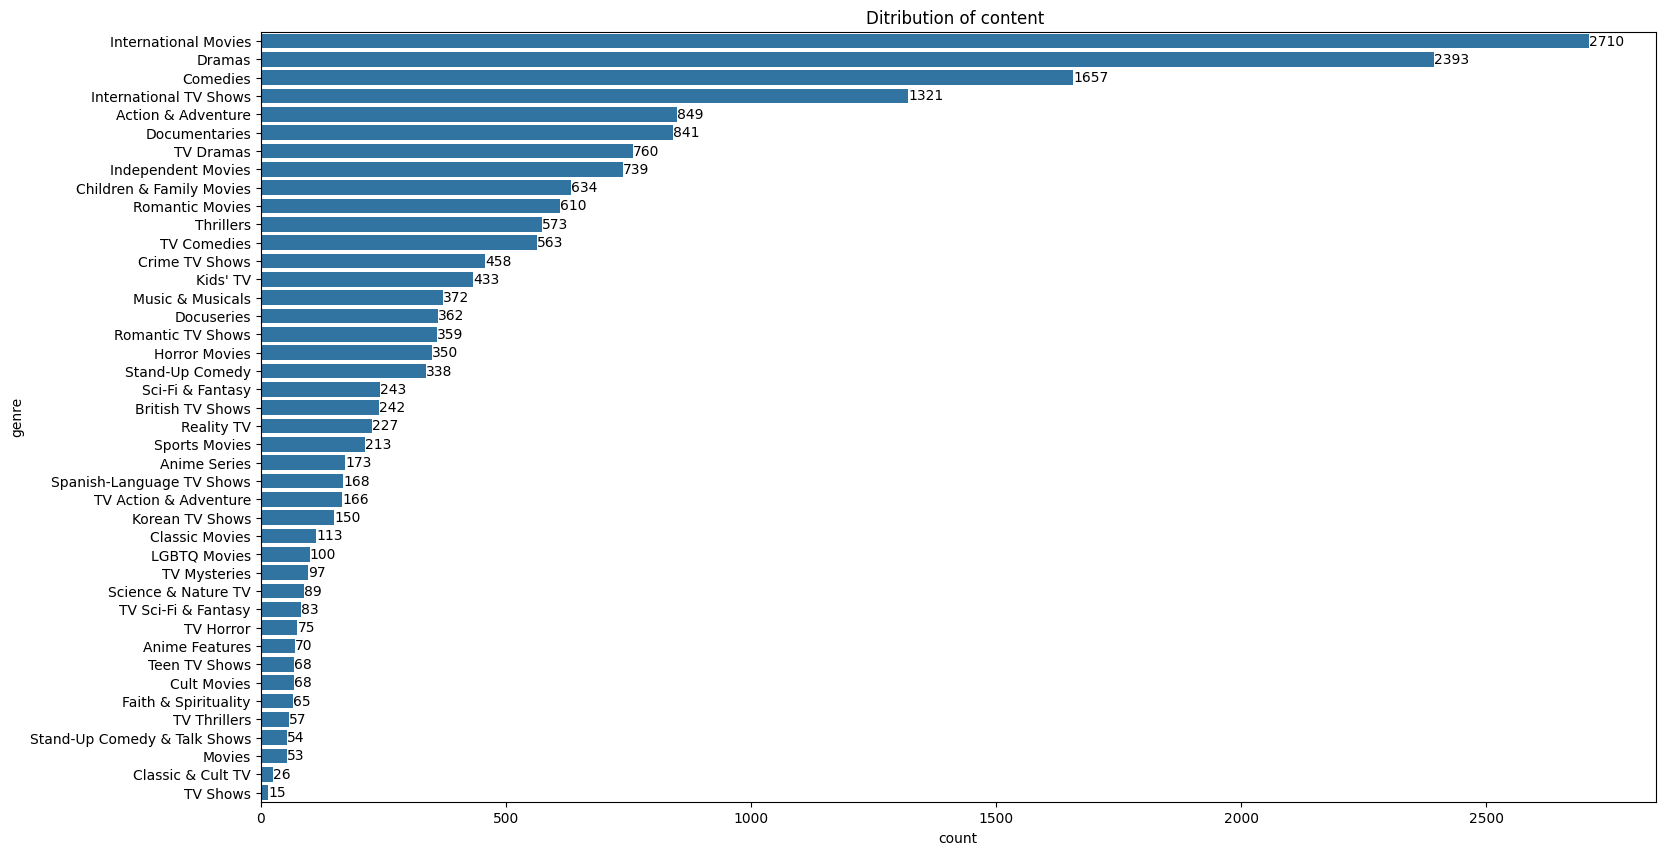

In [61]:
plt.figure(figsize = (18,10))
label=sns.countplot(y= "genre" ,order=df_genre['genre'].value_counts().index, data =df_genre )
for i in label.containers:
  label.bar_label(i)
plt.title("Ditribution of content ")
plt.show()

Inference

From the above graph, it is inferred that most of the content fall under international movie followed by drama and Comedy genre.


**Most popular genre in Movies**

In [62]:
gm = df_movies.groupby("genre")["title"].nunique().sort_values(ascending=False)
gm

,title
genre,
International Movies,2710
Dramas,2393
Comedies,1657
Action & Adventure,849
Documentaries,841
Independent Movies,739
Children & Family Movies,634
Romantic Movies,610
Thrillers,573


**Most popular Genre in TV Shows.**

In [63]:
gt = df_tvs.groupby("genre")["title"].nunique().sort_values(ascending=False)
gt

,title
genre,
International TV Shows,1321
TV Dramas,760
TV Comedies,563
Crime TV Shows,458
Kids' TV,433
Docuseries,362
Romantic TV Shows,359
British TV Shows,242
Reality TV,227


In [64]:
df_movies_temp = df_movies.drop_duplicates(subset = ['genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre','title'])

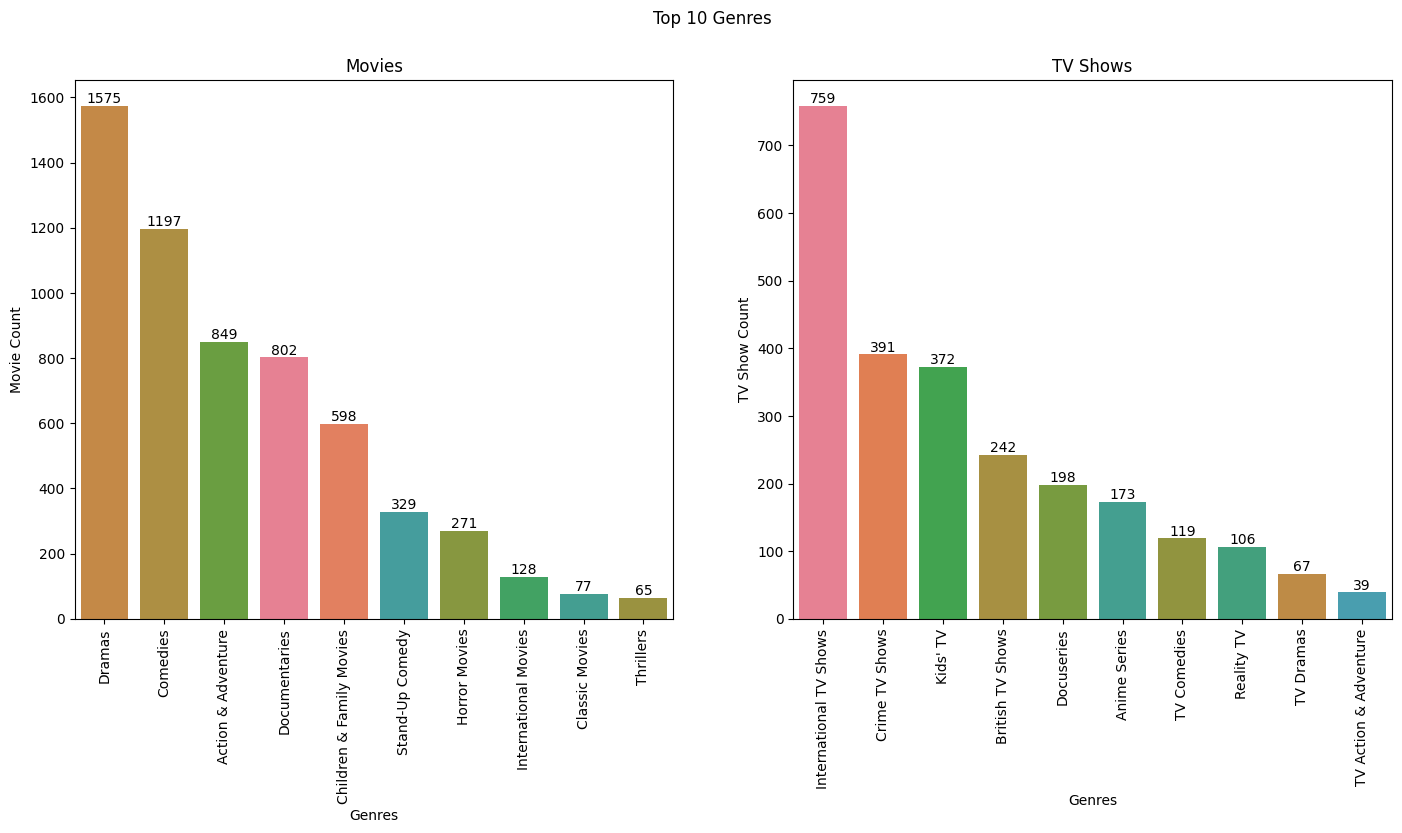

In [99]:
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='genre', hue='genre', order=df_movies_temp['genre'].value_counts().head(10).index, palette='husl', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title("Movies")
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='genre', hue='genre', order=df_tvs_temp['genre'].value_counts().head(10).index, palette='husl', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title("TV Shows")
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()


**Recommendations**

The count of Drama and International genre is very high as compared to other genres for TV Shows, Netfl ix should try adding more content of
different genres as well.

**.. 2. Comparison of tv shows vs movies..**

**a. Find the number of movies produced in each country and pick the top 10 countries.**

In [67]:
df_temp = new_df.drop_duplicates(subset = ['country', 'title'])
df_movies = df_temp.loc[df_temp['type']=='Movie']
movies =df_movies.loc[df_movies["country"] != "Unknown country"]
movies_by_country=movies.groupby('country')['title'].nunique()
movies_by_country

,title
country,
,1
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Vatican City,1
Venezuela,3
Vietnam,7


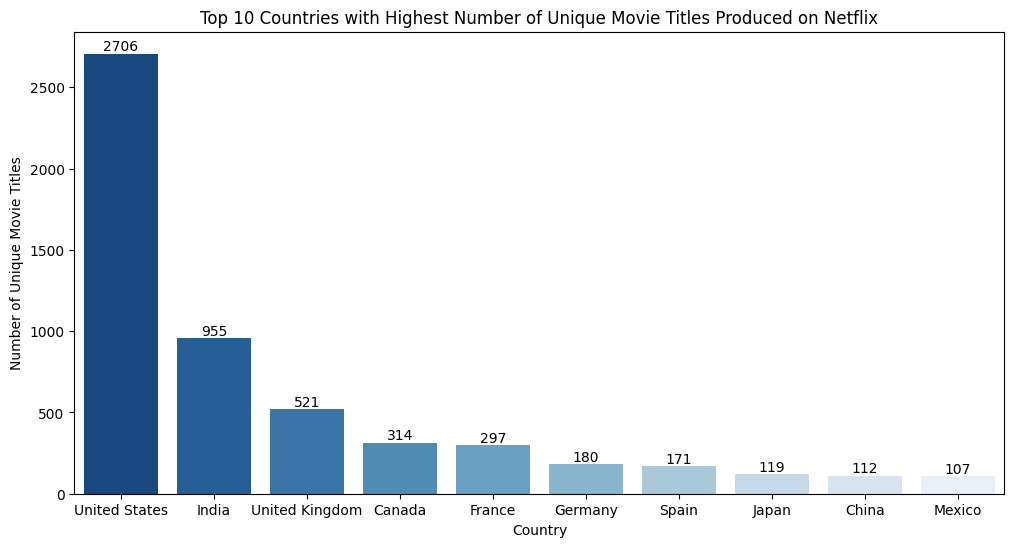

In [70]:
plt.figure(figsize=(12,6))
label = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, hue=top_10_countries.index, palette='Blues_r', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([],[], frameon=False)
plt.title('Top 10 Countries with Highest Number of Unique Movie Titles Produced on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Unique Movie Titles')
plt.show()


**b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.**

In [71]:
df_temp = new_df.drop_duplicates(subset = ['country', 'title'])
df_tvs = df_temp.loc[df_temp['type']=='TV Show']
tvs =df_tvs.loc[df_tvs["country"] != "Unknown country"]
tvs_by_country=tvs.groupby('country')['title'].nunique()
tvs_by_country

,title
country,
,1
Argentina,20
Australia,64
Austria,1
Azerbaijan,1
...,...
United Arab Emirates,1
United Kingdom,269
United States,931


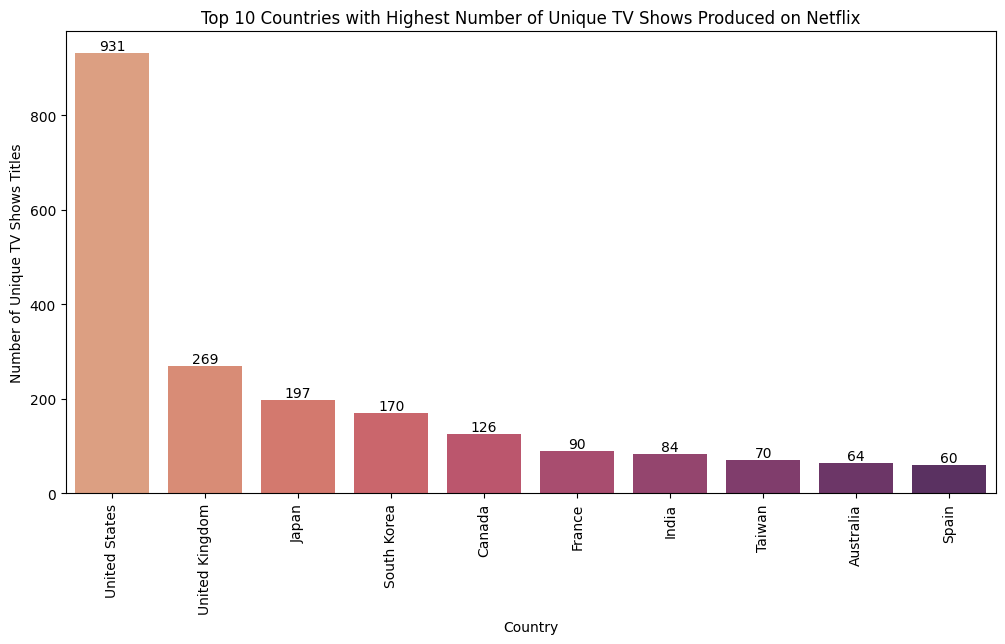

In [98]:
top_10_countries = tvs_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
label = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, hue=top_10_countries.index, palette='flare', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title('Top 10 Countries with Highest Number of Unique TV Shows Produced on Netflix')
plt.ylabel('Number of Unique TV Shows Titles')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.show()


**Inference**

US has the most content for movies followed by India and UK. TV Shows are mostly created in the US and UK. We can also observe that all the
countries have more movies than TV Shows, whereas Jpaan and South Korea have more TV shows than movies.

**Recommendation**

The difference between the number of movies and Tv shows for all the countries is very high especially for India. This should be minimised by
adding more TV Shows as TV Shows can keep a user engaged for 2-3 seasons rated than a 100 minute movie.
TV Shows have also been very popular in recent times and are the new and demanded versions of a movie.

**................................................................................. 3. What is the best time to launch a TV show?...............................................................................**

**a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**

**b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**

In [74]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])

In [75]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

In [76]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]

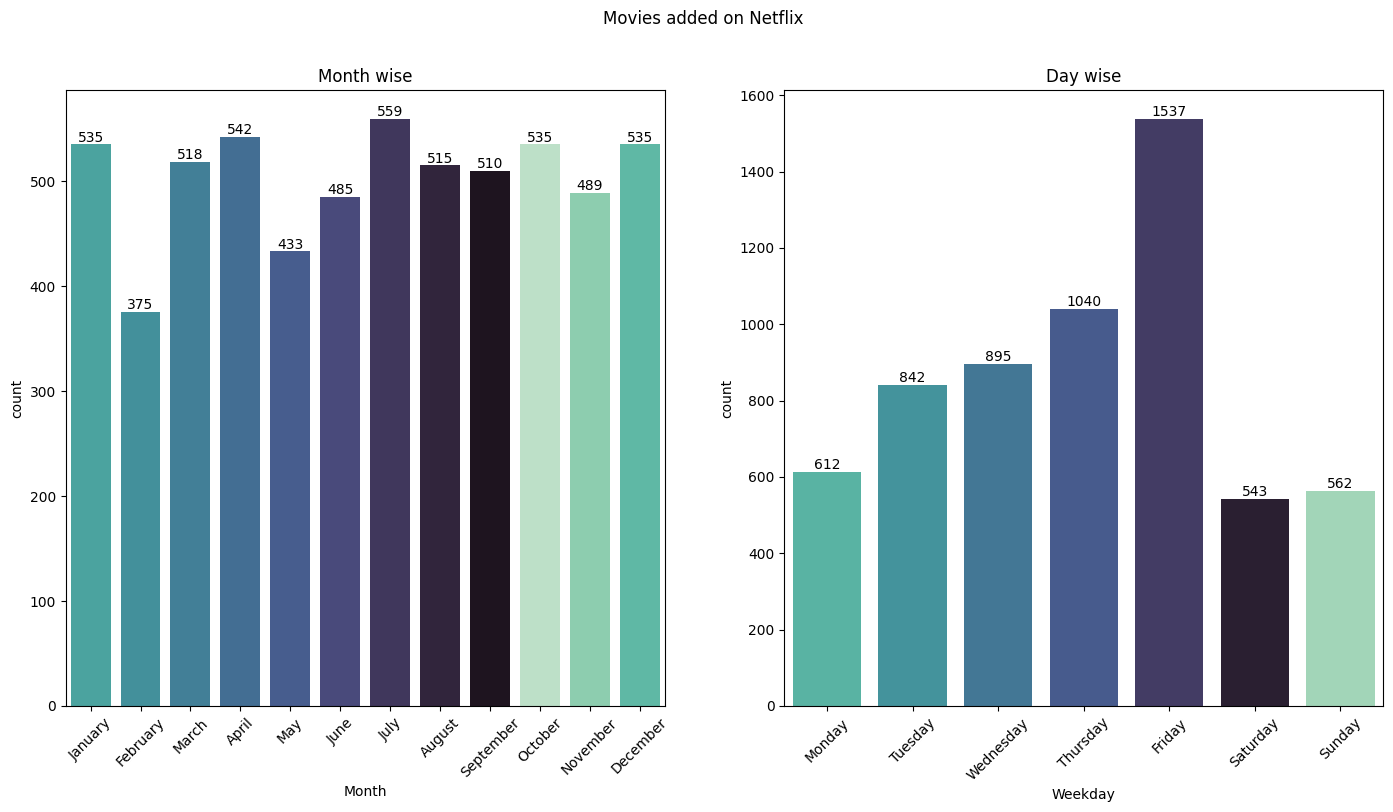

In [97]:
plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='month_name', hue='month_name', order=mv_month.index, palette='mako', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,2,2)
label = sns.countplot(data=df_movies_temp, x='weekday', hue='weekday', order=mv_day.index, palette='mako', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')

plt.show()


**Inference .**We can see that most movies were released on Friday

In [80]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])

In [81]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]

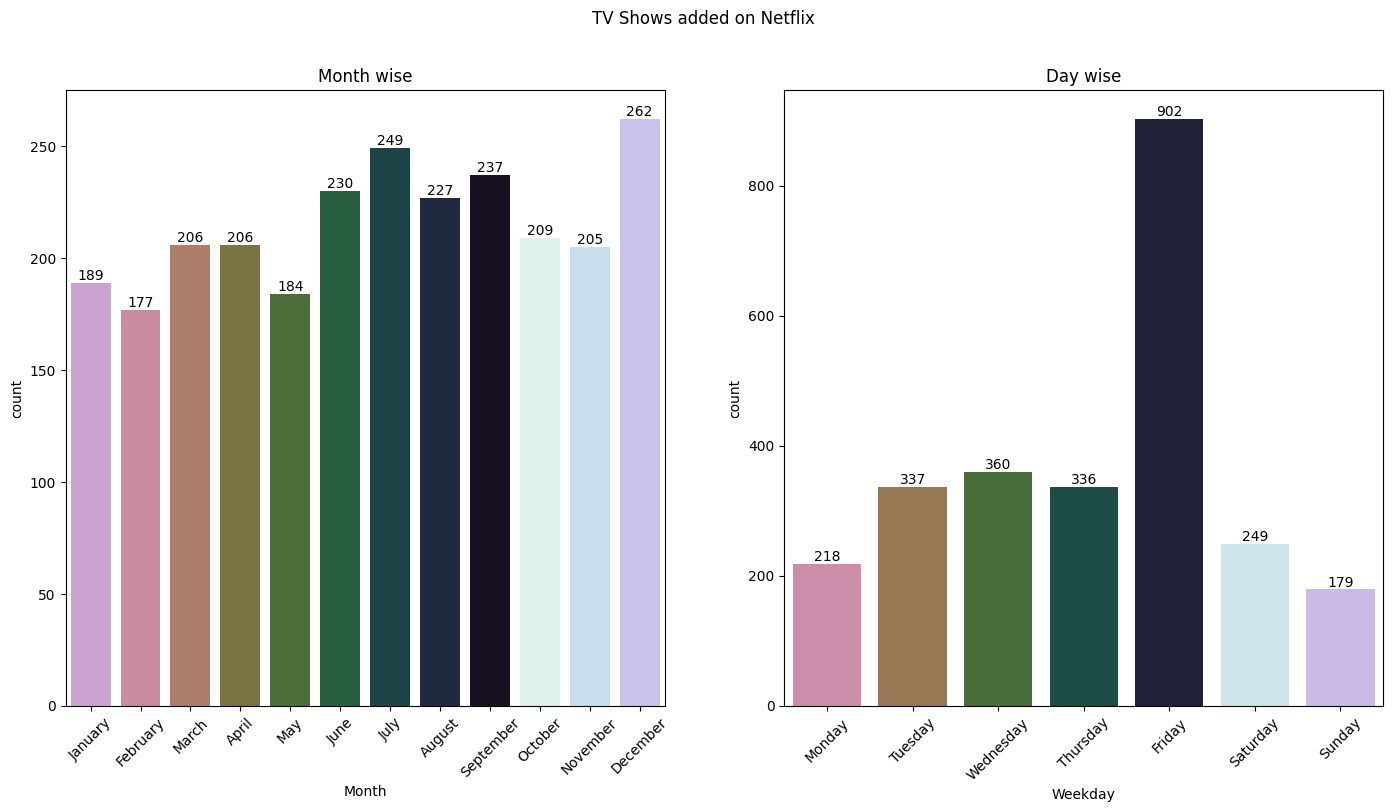

In [96]:
plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,2,1)
label = sns.countplot(data=df_tvs_temp, x='month_name', hue='month_name', order=tv_month.index, palette='cubehelix', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='weekday', hue='weekday', order=tv_day.index, palette='cubehelix', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')

plt.show()


**Inference**

As per the data, most TV Shows were released the most in December followed by July and September. We can also see that most shows were
released on Friday.

To increase viewership in India, more shows should be released during the vacation or festival seasons which are around April-May and
between October and December.

 **............................4. Analysis of actors/directors of different types of shows/movies.............................**


**A. Identify the top 10 actors who have appeared in most movies or TV shows.**

In [84]:
actor_counts = new_df.groupby("cast")["title"].nunique()
top_actors = actor_counts.sort_values(ascending=False)[1:11]
top_actors

,title
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Yuki Kaji,29
Om Puri,29


In [85]:
movies_df = new_df[new_df['type'] == 'Movie']
movies_df=movies_df.drop_duplicates(subset = ['cast','title'])
tvshows_df = new_df[new_df['type'] == 'TV Show']
tvshows_df=tvshows_df.drop_duplicates(subset = ['cast','title'])
top_movies_actors = movies_df['cast'].value_counts()[1:11]
top_tvshows_actors = tvshows_df['cast'].value_counts()[1:11]

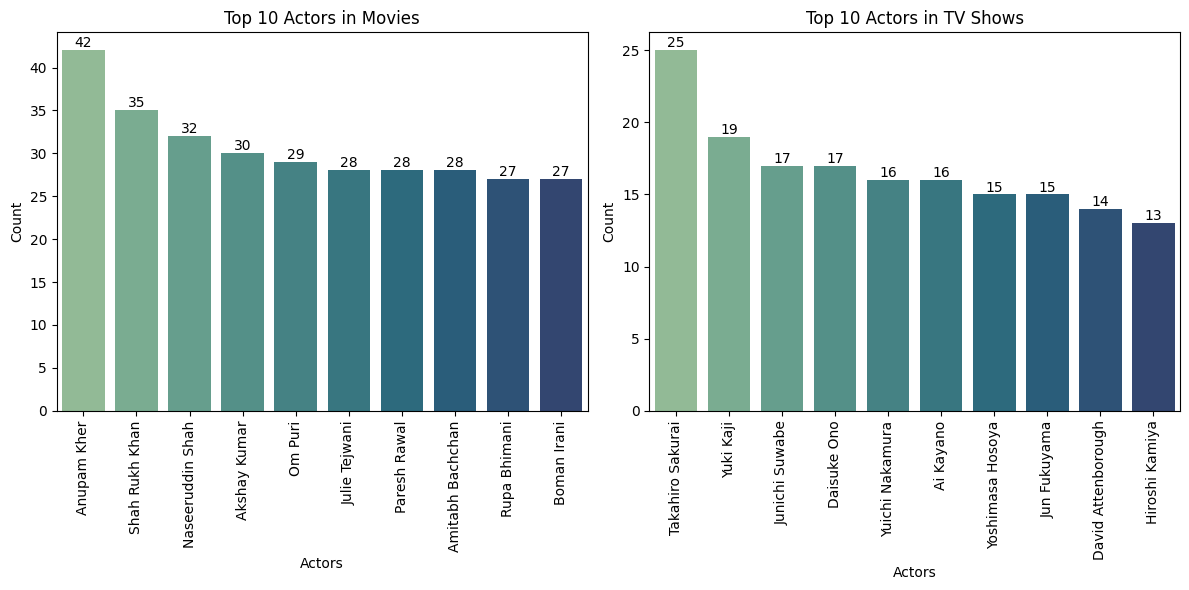

In [95]:
plt.figure(figsize=(12, 6))

# Top 10 Actors in Movies
plt.subplot(1, 2, 1)
label = sns.barplot(x=top_movies_actors.index, y=top_movies_actors.values, hue=top_movies_actors.index, palette='crest', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title('Top 10 Actors in Movies')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Top 10 Actors in TV Shows
plt.subplot(1, 2, 2)
label = sns.barplot(x=top_tvshows_actors.index, y=top_tvshows_actors.values, hue=top_tvshows_actors.index, palette='crest', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title('Top 10 Actors in TV Shows')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


We can clearly see that Anupam Kher has done the most amount of movies followed by Shah Rukh Khan and Julie Tejwani.

**B.Identify the top 10 directors who have appeared in most movies or TV shows.**

In [88]:
director_counts = new_df.groupby("director")["title"].nunique()
top_directors = director_counts.sort_values(ascending=False)[1:11]
top_directors

,title
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


In [89]:
movies_df = new_df[new_df['type'] == 'Movie']
movies_df=movies_df.drop_duplicates(subset = ['director','title'])
tvshows_df = new_df[new_df['type'] == 'TV Show']
tvshows_df=tvshows_df.drop_duplicates(subset = ['director','title'])

In [90]:
top_movies_directors = movies_df['director'].value_counts()[1:11]
top_tvs_directors = tvshows_df['director'].value_counts()[1:11]

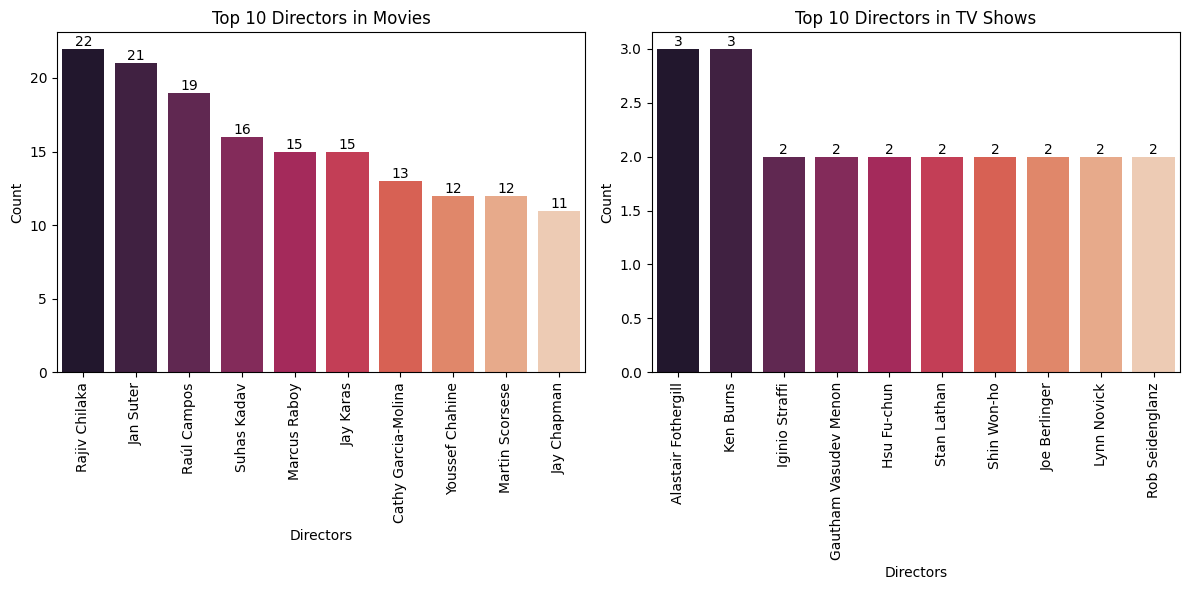

In [93]:
plt.figure(figsize=(12, 6))

# Top 10 Directors in Movies
plt.subplot(1, 2, 1)
label = sns.barplot(x=top_movies_directors.index, y=top_movies_directors.values, hue=top_movies_directors.index, palette='rocket', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title('Top 10 Directors in Movies')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Top 10 Directors in TV Shows
plt.subplot(1, 2, 2)
label = sns.barplot(x=top_tvs_directors.index, y=top_tvs_directors.values, hue=top_tvs_directors.index, palette='rocket', dodge=False)
for i in label.containers:
    label.bar_label(i)
plt.legend([], [], frameon=False)
plt.title('Top 10 Directors in TV Shows')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**5.Which genre movies are more popular or produced more.**

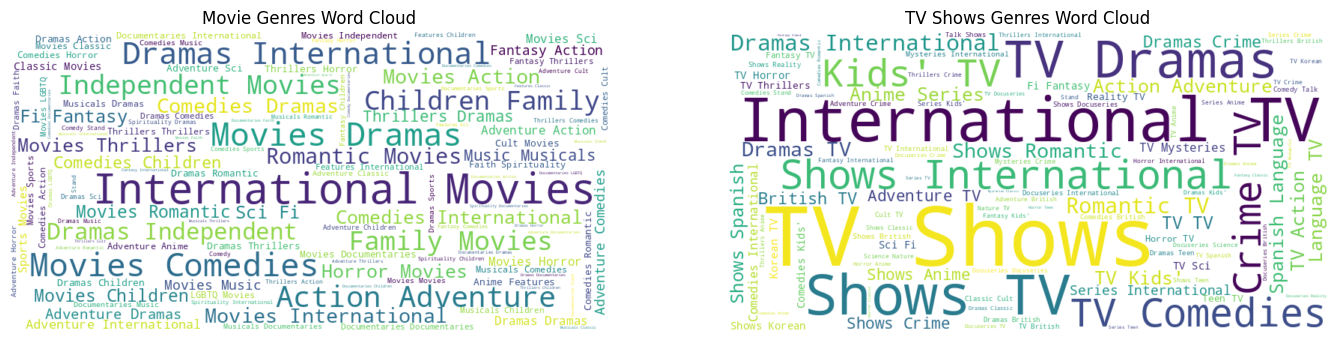

In [101]:
movies=new_df[new_df['type']=='Movie']
genre_text = ' '.join(movies['genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
plt.figure(figsize=(17, 10))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genres Word Cloud")
tvs=new_df[new_df['type']=='TV Show']
genre_text = ' '.join(tvs['genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres Word Cloud")
plt.show()

**6.Find After how many days the movie will be added to Netfl ix after the release of the movie (you can consider the recent past data)**

In [102]:
df["years_since_release"] = df["year"] - df["release_year"]
mode_difference = df['years_since_release'].mode()[0]
mode_difference

0

Mode=0, means that most movies are added to Netfl ix in the same year they are released. This suggests that Netfl ix tends to add movies to its
platform as soon as they are released. This could be a strategy to keep their content fresh and up-to-date, and to attract viewers who are
interested in watching the latest movies.

In [103]:
t=df["years_since_release"].value_counts()
t

,count
years_since_release,
0,3158
1,1549
2,703
3,480
4,358
...,...
63,1
61,1
-3,1


**RECOMENDATIONS**

1- Netflix should expand its content library to include a broader range of TV shows to cater to the diverse interests of its viewers. This can help
attract new subscribers and retain existing ones.

2- Collaborating with renowned directors could lead to the creation of more captivating movies and TV shows, which can help Netfl ix stand out
in a crowded market.

3- Additionally, Netfl ix should consider working with emerging directors who exhibit potential through their previous work. This can help the
company discover fresh talent and create unique content.

4- Exploring different film genres such as horror and comedy, beyond international films, would diversify Netfl ix’s content library and appeal to a
wider audience.

5- Within the realm of TV shows, focusing on the thriller genre could be benefi cial for generating more viewership and engagement. Thrillers are
popular among audiences and can keep them hooked for multiple episodes.

6- DIncreasing the yearly production of original content can demonstrate Netfl ix’s commitment to supporting new talent and creating fresh
content. This can help attract new subscribers and retain existing ones.

7- Strategic release timing during holidays, year-end, and weekends can maximize viewership and engagement. This is because people tend to
have more free time during these periods and are more likely to watch movies or TV shows.

8- Some well-received movies could be directly released on Netfl ix, boosting subscriptions. This can help Netfl ix secure exclusive rights to
popular movies and attract new subscribers.

9- Leveraging actors with large fan followings for TV shows or web series can attract dedicated viewership and increase engagement. This is
because fans are more likely to watch content featuring their favorite actors.

10- Targeted advertising in countries with limited local content can help Netfl ix appeal to a broader audience. This can help the company
expand its global reach and attract new subscribers.